In [50]:
#Import important packages
import GEOparse as gpar
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import pandas as np
from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
gse=gpar.get_GEO("GSE22552")


17-Apr-2022 10:33:00 DEBUG utils - Directory ./ already exists. Skipping.
17-Apr-2022 10:33:00 INFO GEOparse - File already exist: using local version.
17-Apr-2022 10:33:00 INFO GEOparse - Parsing ./GSE22552_family.soft.gz: 
17-Apr-2022 10:33:00 DEBUG GEOparse - DATABASE: GeoMiame
17-Apr-2022 10:33:00 DEBUG GEOparse - SERIES: GSE22552
17-Apr-2022 10:33:00 DEBUG GEOparse - PLATFORM: GPL570
C:\Users\malak\anaconda3\lib\site-packages\GEOparse\GEOparse.py:113: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return parse_GSE(filepath, open_kwargs=open_kwargs)
17-Apr-2022 10:33:02 DEBUG GEOparse - SAMPLE: GSM559689
17-Apr-2022 10:33:02 DEBUG GEOparse - SAMPLE: GSM559690
17-Apr-2022 10:33:03 DEBUG GEOparse - SAMPLE: GSM559691
17-Apr-2022 10:33:03 DEBUG GEOparse - SAMPLE: GSM559692
17-Apr-2022 10:33:03 DEBUG GEOparse - SAMPLE: GSM559693
17-Apr-2022 10:33:03 DEBUG GEOparse - SAMPLE: GSM559694
17-Apr-2022 10:33:03 DEBUG GEOparse - SAMPLE: GSM5

In [8]:
gse.gsms
gse.gpls


In [4]:
#Task 1 , delete the four unsorted samples
del  gse.gsms['GSM559701'],gse.gsms['GSM559702'],gse.gsms['GSM559703'],gse.gsms['GSM559704']

In [5]:
#Import pandas
import pandas as pd
#Create Table for gene expression values per sample

frames=[]
for sample in gse.gsms:
    frames.append(gse.gsms[sample].table.set_index("ID_REF"))
gse_con=pd.concat(frames,axis=1)
gse_con.columns=gse.gsms.keys()



gse_con

,GSM559689,GSM559690,GSM559691,GSM559692,GSM559693,GSM559694,GSM559695,GSM559696,GSM559697,GSM559698,GSM559699,GSM559700
ID_REF,,,,,,,,,,,,
1007_s_at,4.946777,4.728418,4.738051,4.762729,4.549447,4.835533,4.709747,4.715527,5.049346,5.631210,5.379607,5.397816
1053_at,8.207308,8.695805,8.383330,8.049325,8.751171,8.381886,7.992828,7.998183,7.401185,5.444929,5.151547,5.207811
117_at,6.311369,5.249919,5.953954,5.532214,5.746198,6.212243,6.870430,7.032106,7.295045,7.667298,7.784505,8.278446
121_at,7.159099,7.062484,7.329124,7.294014,7.006325,7.283475,7.156998,7.201767,7.397696,7.543862,7.869274,7.897521
1255_g_at,3.821799,3.603829,3.691750,3.791226,3.654054,3.681459,4.896534,4.008463,4.508532,4.946233,3.765626,4.096830
...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,5.624310,5.326154,5.588887,4.996499,5.471355,5.893110,5.743403,5.517842,6.319863,6.153024,6.339153,6.779153
AFFX-ThrX-M_at,6.589780,7.078883,7.219033,6.143109,6.954125,7.585613,7.354877,7.337199,8.222956,7.808429,8.113187,8.420713
AFFX-TrpnX-3_at,3.267483,3.231707,3.019570,3.382046,3.186596,3.207259,3.246196,3.197220,3.210587,3.385809,3.295025,3.326088


In [12]:
#TAsk 2 Summary statistics for gene expression values
stat=gse_con.describe()
print(stat)

    


          GSM559689     GSM559690     GSM559691     GSM559692     GSM559693  \
count  54675.000000  54675.000000  54675.000000  54675.000000  54675.000000   
mean       5.631351      5.645538      5.647177      5.643353      5.650497   
std        2.008718      2.151832      2.135346      2.050417      2.132387   
min        2.552829      2.592396      2.557528      2.570300      2.590768   
25%        4.068560      3.935353      3.958457      4.037548      3.958517   
50%        5.234648      5.099071      5.140122      5.176868      5.138922   
75%        6.701256      6.920745      6.851461      6.774580      6.859045   
max       14.290997     14.424771     14.416912     14.270190     14.423644   

          GSM559694     GSM559695     GSM559696     GSM559697     GSM559698  \
count  54675.000000  54675.000000  54675.000000  54675.000000  54675.000000   
mean       5.646240      5.647751      5.648663      5.642804      5.641746   
std        2.122161      2.103597      2.102086    

In [13]:
#Task 3 Are there any missing values in the data? 
gse_con.isna()
#no missing values

,GSM559689,GSM559690,GSM559691,GSM559692,GSM559693,GSM559694,GSM559695,GSM559696,GSM559697,GSM559698,GSM559699,GSM559700
ID_REF,,,,,,,,,,,,
1007_s_at,False,False,False,False,False,False,False,False,False,False,False,False
1053_at,False,False,False,False,False,False,False,False,False,False,False,False
117_at,False,False,False,False,False,False,False,False,False,False,False,False
121_at,False,False,False,False,False,False,False,False,False,False,False,False
1255_g_at,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,False,False,False,False,False,False,False,False,False,False,False,False
AFFX-ThrX-M_at,False,False,False,False,False,False,False,False,False,False,False,False
AFFX-TrpnX-3_at,False,False,False,False,False,False,False,False,False,False,False,False


{'GSM559689': 1.0135025400372657, 'GSM559690': 0.9775606836049099, 'GSM559691': 0.9998475910495774, 'GSM559692': 1.0097615292962634, 'GSM559693': 0.99459200738785, 'GSM559694': 1.0045587563320313, 'GSM559695': 0.9956768432014406, 'GSM559696': 1.0072921267588373, 'GSM559697': 1.0200911964440844, 'GSM559698': 1.0631592727543984, 'GSM559699': 1.1698174052212191, 'GSM559700': 1.1326527065046263}
{'GSM559689': 0.8161331620019334, 'GSM559690': 0.4184328662708685, 'GSM559691': 0.5545368290416248, 'GSM559692': 0.6706718016946178, 'GSM559693': 0.5318514966027807, 'GSM559694': 0.5969290057446517, 'GSM559695': 0.5876065934719819, 'GSM559696': 0.6151793076264656, 'GSM559697': 0.6958615637327599, 'GSM559698': 1.0596664852100819, 'GSM559699': 1.3981606991275317, 'GSM559700': 1.277798050233148}


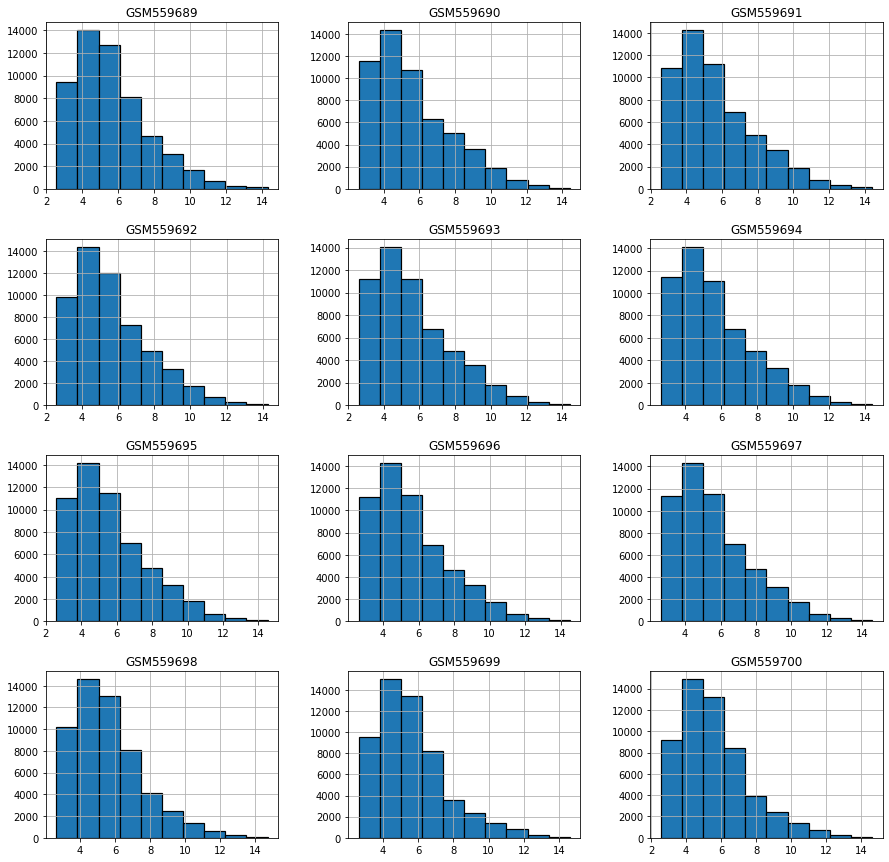

In [66]:
#Plot histograms for the distribution of values in each one of the 12 samples. 
#Calculate the skewness and kurtosis for each and write down your observations.

gse_con.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,15)


#skew and kurtosis
skew_cal={}
kurtosis_cal={}
for i in gse_con:
    skew_cal[i]=gse_con.skew()[i]
    kurtosis_cal[i]=gse_con.kurtosis()[i]

print(skew_cal)
print(kurtosis_cal)
#Observation
#The range of gene expression values is between 2 and 14, the most frequent gene expression value is between 4-6 in all samples
#According to skewness calculation, most graphs are >+1, meaning that there is positive skewness
#Kurtosis 
#the tails are lighter than the normal distribution <3

In [ ]:
#Remove genes with expression less than 6.0 in 10 or more out of 12 samples. Recalculate summary
#statistics and plot histograms. Write down your observations.

In [45]:
filtered_gse=[]
for i in gse_con:
    filtered_gse.append(gse_con[i] > 6)

filtered_gse=pd.concat(filtered_gse,axis=1)
filtered_gse.columns=gse.gsms.keys()

filtered_gse

,GSM559689,GSM559690,GSM559691,GSM559692,GSM559693,GSM559694,GSM559695,GSM559696,GSM559697,GSM559698,GSM559699,GSM559700
ID_REF,,,,,,,,,,,,
1007_s_at,False,False,False,False,False,False,False,False,False,False,False,False
1053_at,True,True,True,True,True,True,True,True,True,False,False,False
117_at,True,False,False,False,False,True,True,True,True,True,True,True
121_at,True,True,True,True,True,True,True,True,True,True,True,True
1255_g_at,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,False,False,False,False,False,False,False,False,True,True,True,True
AFFX-ThrX-M_at,True,True,True,True,True,True,True,True,True,True,True,True
AFFX-TrpnX-3_at,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
gse_con2=gse_con[filtered_gse]
gse_con2

,GSM559689,GSM559690,GSM559691,GSM559692,GSM559693,GSM559694,GSM559695,GSM559696,GSM559697,GSM559698,GSM559699,GSM559700
ID_REF,,,,,,,,,,,,
1007_s_at,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053_at,8.207308,8.695805,8.383330,8.049325,8.751171,8.381886,7.992828,7.998183,7.401185,NaN,NaN,NaN
117_at,6.311369,NaN,NaN,NaN,NaN,6.212243,6.870430,7.032106,7.295045,7.667298,7.784505,8.278446
121_at,7.159099,7.062484,7.329124,7.294014,7.006325,7.283475,7.156998,7.201767,7.397696,7.543862,7.869274,7.897521
1255_g_at,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.319863,6.153024,6.339153,6.779153
AFFX-ThrX-M_at,6.589780,7.078883,7.219033,6.143109,6.954125,7.585613,7.354877,7.337199,8.222956,7.808429,8.113187,8.420713
AFFX-TrpnX-3_at,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
stat2=gse_con2.describe()
print(stat2)


          GSM559689     GSM559690     GSM559691     GSM559692     GSM559693  \
count  19255.000000  19071.000000  19240.000000  19164.000000  19220.000000   
mean       7.849795      8.110284      8.051903      7.944158      8.055743   
std        1.568461      1.597863      1.625191      1.576036      1.618209   
min        6.000024      6.000140      6.000099      6.000115      6.000131   
25%        6.592482      6.797053      6.713888      6.653699      6.717774   
50%        7.442535      7.819115      7.722197      7.587909      7.730397   
75%        8.753254      9.077148      9.035576      8.870625      9.030752   
max       14.290997     14.424771     14.416912     14.270190     14.423644   

          GSM559694     GSM559695     GSM559696     GSM559697     GSM559698  \
count  19233.000000  19333.000000  19224.000000  19206.000000  19429.000000   
mean       8.032969      7.997961      8.007794      7.986219      7.761986   
std        1.619504      1.607494      1.612214    

0.4945017380503103

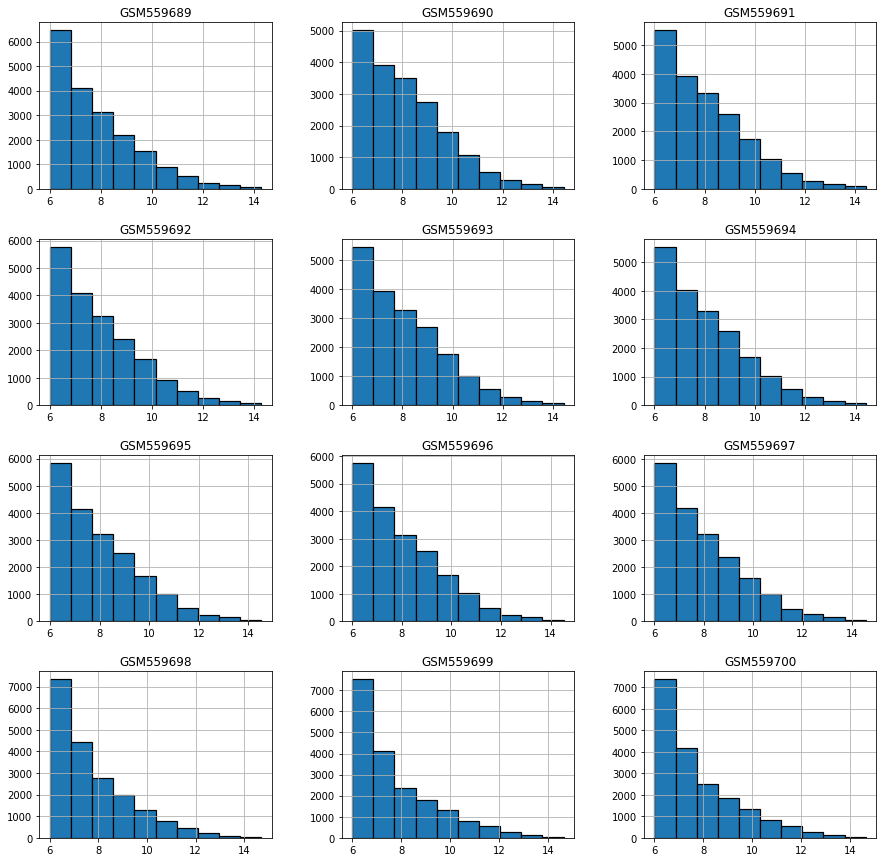

In [57]:
gse_con2.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,15)

#Observation
#The range of gene expression values is between 6 and 14, the most frequent gene expression value is between 6 in all samples
# There are many NA value due to gene expression data <6

In [102]:
#Summarise replicates so that for each gene there is a single value only for each one of the four
#stages. What method would you use to summarise replicates? Why?

#I am summarizing using the mean; since i have already filtered the data to exclude low expression values 'outliers' , so the mean wouldn't be affected of those values

mean=[]
mean.append(gse_con2.iloc[0:, 0:3].mean(axis=1))
mean.append(gse_con2.iloc[0:, 3:6].mean(axis=1))
mean.append(gse_con2.iloc[0:, 6:9].mean(axis=1))
mean.append(gse_con2.iloc[0:, 9:12].mean(axis=1))


mean_df=pd.concat(mean,axis=1)
mean_df.columns=['CFU-E', 'Pro-E', 'Int-E', 'Late-E']

mean_df

,CFU-E,Pro-E,Int-E,Late-E
ID_REF,,,,
1007_s_at,NaN,NaN,NaN,NaN
1053_at,8.383330,8.381886,7.992828,NaN
117_at,6.311369,6.212243,7.032106,7.784505
121_at,7.159099,7.283475,7.201767,7.869274
1255_g_at,NaN,NaN,NaN,NaN
...,...,...,...,...
AFFX-ThrX-5_at,NaN,NaN,6.319863,6.339153
AFFX-ThrX-M_at,7.078883,6.954125,7.354877,8.113187
AFFX-TrpnX-3_at,NaN,NaN,NaN,NaN
